In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT/Dataset/train.csv')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d/%m/%Y")
data["Year"] = data["Order Date"].dt.year

In [5]:
highestsellingproduct = data.groupby(['Year', 'Category', 'Sub-Category'])['Sales'].sum().reset_index()
print(highestsellingproduct)

    Year         Category Sub-Category        Sales
0   2015        Furniture    Bookcases   20036.6776
1   2015        Furniture       Chairs   77046.4400
2   2015        Furniture  Furnishings   13636.9860
3   2015        Furniture       Tables   45757.7775
4   2015  Office Supplies   Appliances   15160.7150
..   ...              ...          ...          ...
63  2018  Office Supplies     Supplies   15952.1100
64  2018       Technology  Accessories   58240.9700
65  2018       Technology      Copiers   62899.3880
66  2018       Technology     Machines   43544.6750
67  2018       Technology       Phones  104685.6580

[68 rows x 4 columns]


In [6]:
highestsellingproduct = highestsellingproduct.loc[highestsellingproduct.groupby('Year')['Sales'].idxmax()]
print("Best Performing Product Category and Sub-Category for Each Year")
print(highestsellingproduct)

Best Performing Product Category and Sub-Category for Each Year
    Year    Category Sub-Category       Sales
16  2015  Technology       Phones   77225.956
18  2016   Furniture       Chairs   70654.673
35  2017   Furniture       Chairs   81930.345
67  2018  Technology       Phones  104685.658


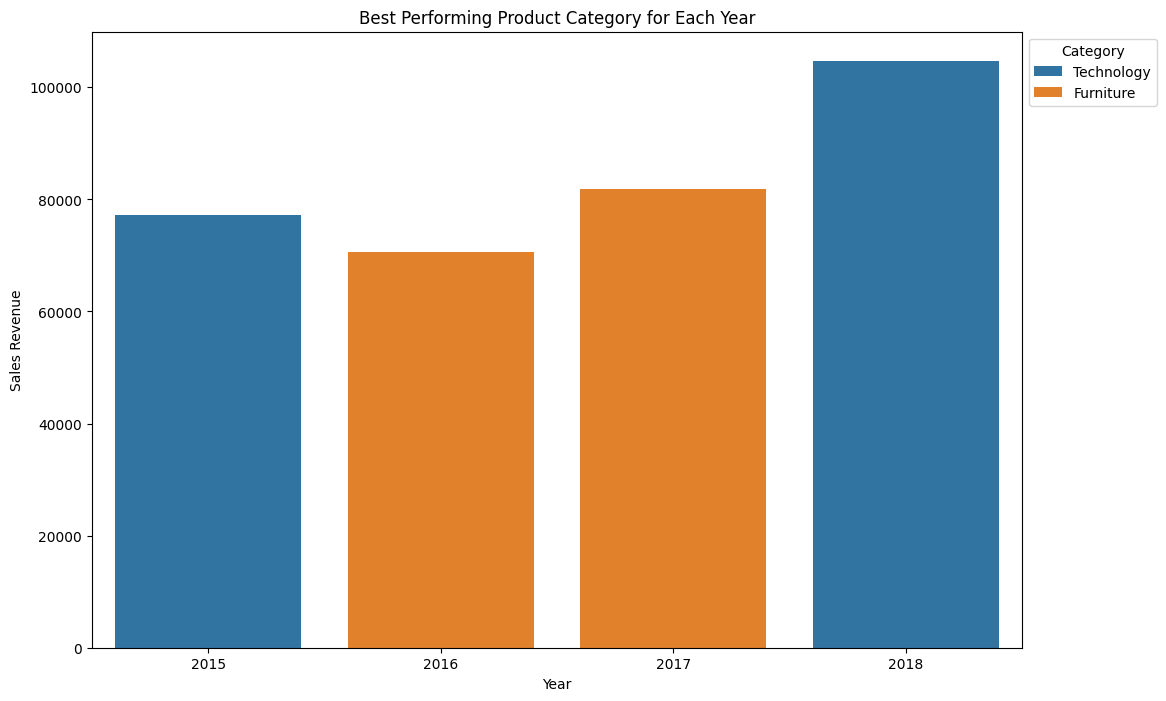

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Sales', hue='Category', data=highestsellingproduct)
plt.title('Best Performing Product Category for Each Year')
plt.xlabel('Year')
plt.ylabel('Sales Revenue')
plt.legend(loc="upper left",bbox_to_anchor=(1,1), title='Category')
plt.show()

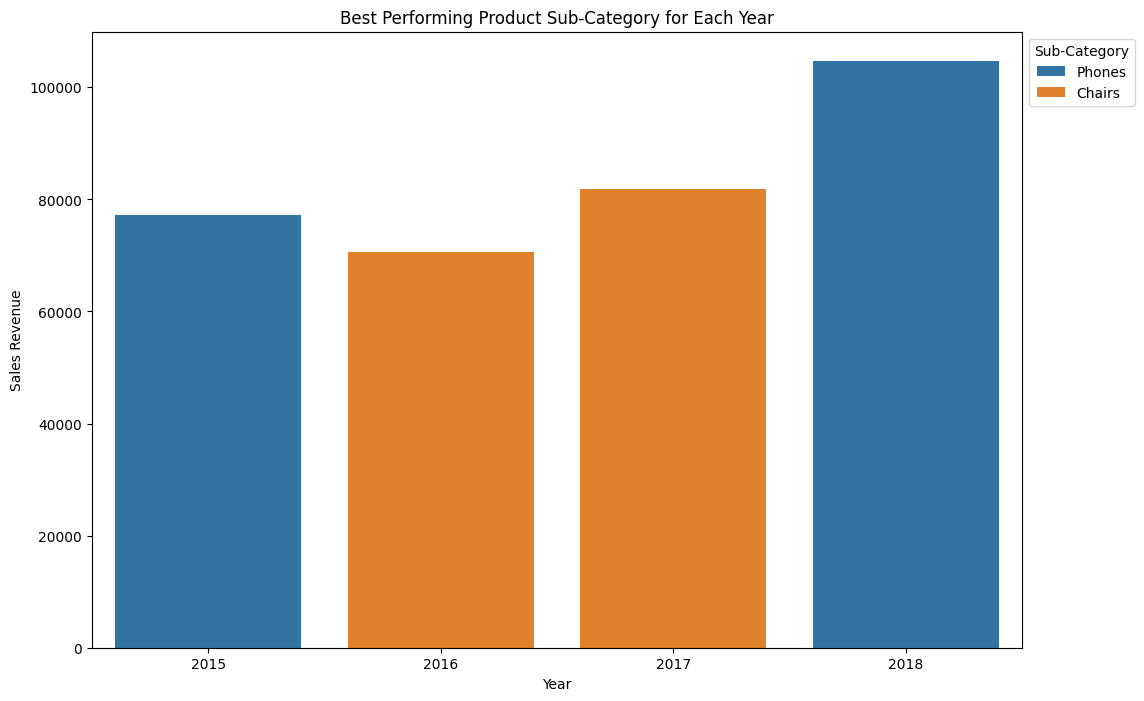

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Sales', hue='Sub-Category', data=highestsellingproduct)
plt.title('Best Performing Product Sub-Category for Each Year')
plt.xlabel('Year')
plt.ylabel('Sales Revenue')
plt.legend(loc="upper left",bbox_to_anchor=(1,1), title='Sub-Category')
plt.show()